# Amazon All Categories Best Seller and Review

##### Data from amazon US on the top 50 selling product and 40 listed categories. 
(https://www.kaggle.com/datasets/tigboatnc/amazon-all-categories-best-sellers-reviews)


##### Includes:
    > Product Name
    > Product Categories
    > Ranking of product in its categories
    > Product review count(Number of review)
    > Product review(first page of review)
       ~includes Meta + Full Review + Rating given by review
    > Cost of item at the time of scraping
    > Product URL

## Import the required modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Uploading the  amazon dataset

In [5]:
amazon_data = pd.read_csv("amazon.csv")
amazon_data

,Unnamed: 0,product_name,category,categoryRank,noRatings,cost,REVIEWLIST,product_url
0,0,Fire TV Stick with Alexa Voice Remote (include...,Amazon Devices & Accessories,#1,"256,226",$39.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-with-3rd-...
1,1,All-new Ring Video Doorbell (2nd Gen) – 1080p ...,Amazon Devices & Accessories,#2,"112,689",$89.99 - $199.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Ring-Video-Door...
2,2,"Echo Dot (3rd Gen, 2018 release) - Smart speak...",Amazon Devices & Accessories,#3,"936,447",$29.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...
3,3,"Fire TV Stick 4K Max streaming device, Wi-Fi 6...",Amazon Devices & Accessories,#4,"69,684",$54.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-4k-max-wi...
4,4,Amazon Smart Plug,Amazon Devices & Accessories,#5,"508,565",$24.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Amazon-Smart-Plug/dp/B0...
...,...,...,...,...,...,...,...,...
1311,1311,"Roblox Digital Gift Card - 4,500 Robux [Includ...",Video Games,#26,"112,204",$44.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Robux-Roblox-Online-Gam...
1312,1312,Animal Crossing: New Horizons - Nintendo Switch,Video Games,#27,"67,564",[],[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Animal-Crossing-New-Hor...
1313,1313,"Roblox Digital Gift Card - 10,000 Robux [Inclu...",Video Games,#28,"112,204",$89.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Roblox-Gift-Card-Exclus...
1314,1314,VALORANT $10 Gift Card - PC [Online Game Code],Video Games,#29,"9,153",$10.00,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/VALORANT-10-Gift-Card-O...


In [6]:
amazon_data.shape

(1316, 8)

In [7]:
amazon_data.head(50)

,Unnamed: 0,product_name,category,categoryRank,noRatings,cost,REVIEWLIST,product_url
0,0,Fire TV Stick with Alexa Voice Remote (include...,Amazon Devices & Accessories,#1,"256,226",$39.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-with-3rd-...
1,1,All-new Ring Video Doorbell (2nd Gen) – 1080p ...,Amazon Devices & Accessories,#2,"112,689",$89.99 - $199.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Ring-Video-Door...
2,2,"Echo Dot (3rd Gen, 2018 release) - Smart speak...",Amazon Devices & Accessories,#3,"936,447",$29.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...
3,3,"Fire TV Stick 4K Max streaming device, Wi-Fi 6...",Amazon Devices & Accessories,#4,"69,684",$54.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-4k-max-wi...
4,4,Amazon Smart Plug,Amazon Devices & Accessories,#5,"508,565",$24.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Amazon-Smart-Plug/dp/B0...
5,5,All-new Echo Dot (4th Gen) | Smart speaker wit...,Amazon Devices & Accessories,#6,"213,937",$49.99 - $77.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Smart-speaker-c...
6,6,Introducing Blink Video Doorbell - P,Amazon Devices & Accessories,#7,"55,172",$49.99 - $279.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Introducing-Blink-Video...
7,7,"Echo Dot (4th Gen, 2020 release) | Smart speak...",Amazon Devices & Accessories,#8,"505,383",$39.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Echo-Dot/dp/B07XJ8C8F5/...
8,8,Blink Mini – Compact indoor plug-in smart secu...,Amazon Devices & Accessories,#9,"200,207",$34.99 - $84.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Blink-Mini-plug-securit...
9,9,"Kindle Paperwhite (8 GB) – Now with a 6.8"" dis...",Amazon Devices & Accessories,#10,"12,075",$139.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Kindle-Paperwhi...


In [8]:
# let describe this data set
# we can see only 1 int value.

amazon_data.describe()                   


,Unnamed: 0
count,1316.000000
mean,657.500000
std,380.040787
min,0.000000
25%,328.750000
50%,657.500000
75%,986.250000
max,1315.000000


In [9]:
# checking for null value.

amazon_data.isnull().sum()

Unnamed: 0      0
product_name    0
category        0
categoryRank    2
noRatings       0
cost            0
REVIEWLIST      0
product_url     0
dtype: int64

<AxesSubplot:>

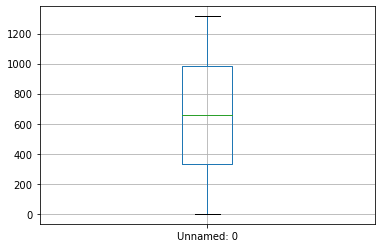

In [10]:
# let's plot some visualization to get some clear approch for data.

amazon_data.boxplot()                     

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>]], dtype=object)

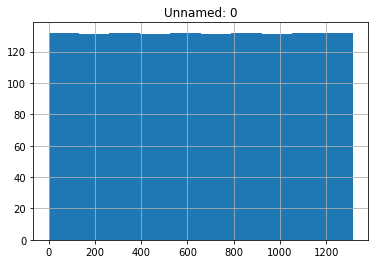

In [11]:
amazon_data.hist()            # the purpose of plotting histogram is to get a clear approch but we didn't get much.

Obsevation: 
    1. Above plot can not clarify the data visualization properly.
    

In [12]:
# checking infomation for null value

amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1316 non-null   int64 
 1   product_name  1316 non-null   object
 2   category      1316 non-null   object
 3   categoryRank  1314 non-null   object
 4   noRatings     1316 non-null   object
 5   cost          1316 non-null   object
 6   REVIEWLIST    1316 non-null   object
 7   product_url   1316 non-null   object
dtypes: int64(1), object(7)
memory usage: 82.4+ KB


> The info shows I got a null value only in categoryRank

##### Data Cleaning Process using mean ,median,mode

In [13]:
# define function using impute fillna

def impute_median(series):
    return series.fillna(series.median())

In [14]:
amazon_data['categoryRank'] = amazon_data['categoryRank'].apply(lambda x:str(x).replace('#',' ') if '#' in str(x) else str(x)).transform(impute_median)

In [15]:
amazon_data.isnull().sum()

Unnamed: 0      0
product_name    0
category        0
categoryRank    0
noRatings       0
cost            0
REVIEWLIST      0
product_url     0
dtype: int64

In [16]:
# mode

print(amazon_data['noRatings'].mode())
print(amazon_data['cost'].mode())

0          1
1    817,360
dtype: object
0    []
dtype: object


In [17]:
# Replacing the unwanted data

amazon_data['categoryRank'] = amazon_data['categoryRank'].apply(lambda x:str(x).replace('str(x)','float(x)') if 'x' in str(x) else float(x))

amazon_data['noRatings'] = amazon_data['noRatings'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else str(x))
amazon_data['noRatings'] = amazon_data['noRatings'].apply(lambda x:str(x).replace('-','') if '-' in str(x) else str(x))
amazon_data['noRatings'] = amazon_data['noRatings'].apply(lambda x:str(x).replace('str(x)','float(x)') if 'x' in str(x) else float(x))


amazon_data['cost'] = amazon_data['cost'].apply(lambda x:str(x).replace('$','') if '$' in str(x) else str(x))
amazon_data['cost'] = amazon_data['cost'].apply(lambda x:str(x).replace('-','') if '-' in str(x) else str(x))
amazon_data['cost'] = amazon_data['cost'].apply(lambda x:str(x).replace('[]','0') if '[]' in str(x) else str(x))





In [18]:
amazon_data.head(10)

,Unnamed: 0,product_name,category,categoryRank,noRatings,cost,REVIEWLIST,product_url
0,0,Fire TV Stick with Alexa Voice Remote (include...,Amazon Devices & Accessories,1.0,256226.0,39.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-with-3rd-...
1,1,All-new Ring Video Doorbell (2nd Gen) – 1080p ...,Amazon Devices & Accessories,2.0,112689.0,89.99 199.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Ring-Video-Door...
2,2,"Echo Dot (3rd Gen, 2018 release) - Smart speak...",Amazon Devices & Accessories,3.0,936447.0,29.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Echo-Dot/dp/B07FZ8S74R/...
3,3,"Fire TV Stick 4K Max streaming device, Wi-Fi 6...",Amazon Devices & Accessories,4.0,69684.0,54.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/fire-tv-stick-4k-max-wi...
4,4,Amazon Smart Plug,Amazon Devices & Accessories,5.0,508565.0,24.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Amazon-Smart-Plug/dp/B0...
5,5,All-new Echo Dot (4th Gen) | Smart speaker wit...,Amazon Devices & Accessories,6.0,213937.0,49.99 77.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Smart-speaker-c...
6,6,Introducing Blink Video Doorbell - P,Amazon Devices & Accessories,7.0,55172.0,49.99 279.98,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Introducing-Blink-Video...
7,7,"Echo Dot (4th Gen, 2020 release) | Smart speak...",Amazon Devices & Accessories,8.0,505383.0,39.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Echo-Dot/dp/B07XJ8C8F5/...
8,8,Blink Mini – Compact indoor plug-in smart secu...,Amazon Devices & Accessories,9.0,200207.0,34.99 84.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/Blink-Mini-plug-securit...
9,9,"Kindle Paperwhite (8 GB) – Now with a 6.8"" dis...",Amazon Devices & Accessories,10.0,12075.0,139.99,[{'review_meta': 'Reviewed in the United State...,https://www.amazon.com/All-new-Kindle-Paperwhi...


##### Observation : 
    1. cleaning and removing unwanted  data in dataset.
    2. changed string numeric value to float value.

In [19]:
# Once again describing the values

amazon_data.describe()

,Unnamed: 0,categoryRank,noRatings
count,1316.000000,1314.00000,1316.000000
mean,657.500000,17.67656,46824.367781
std,380.040787,10.97902,106183.312797
min,0.000000,1.00000,1.000000
25%,328.750000,9.00000,1899.250000
50%,657.500000,17.00000,16138.000000
75%,986.250000,25.00000,53075.250000
max,1315.000000,50.00000,936447.000000


## DATA VISUALIZATION

In [20]:
grp = amazon_data.groupby('category')
grp

x = grp['categoryRank'].agg(np.mean)
y = grp['Unnamed: 0'].agg(np.mean)
z = grp['noRatings'].agg(np.mean)

print(x)
print(y)

category
Amazon Devices & Accessories     25.500000
Amazon Explore                   15.500000
Amazon Launchpad                 15.500000
Appliances                       15.310345
Apps & Games                     15.500000
Arts, Crafts & Sewing            15.500000
Audible Books & Originals        15.500000
Automotive                       15.500000
Baby                             15.500000
Beauty & Personal Care           15.500000
Books                            15.500000
CDs & Vinyl                      15.500000
Camera & Photo Products          15.500000
Cell Phones & Accessories        23.500000
Clothing, Shoes & Jewelry        15.500000
Collectible Coins                15.500000
Computers & Accessories          15.500000
Digital Educational Resources    15.500000
Electronics                      15.500000
Entertainment Collectibles       15.500000
Gift Cards                       15.500000
Grocery & Gourmet Food           15.500000
Handmade Products                15.500000
He

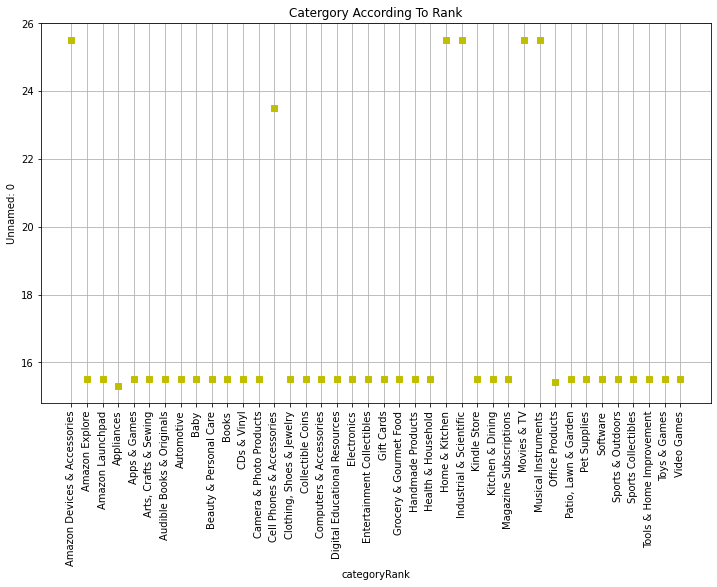

In [21]:
# scatter plot for visualization

plt.figure(figsize=(12,7))

plt.xticks(rotation=90)
plt.plot(x,'ys');

plt.title('Catergory According To Rank')

plt.xlabel('categoryRank')
plt.ylabel('Unnamed: 0')


plt.grid()
plt.show()


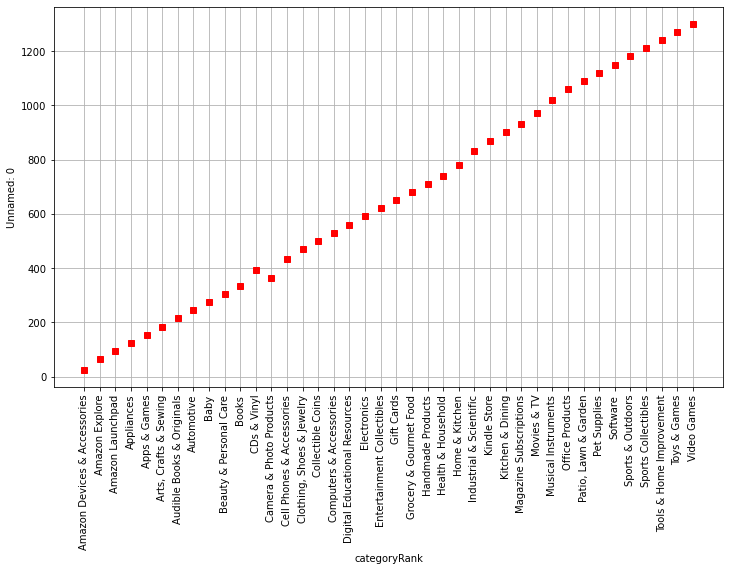

In [22]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)

plt.plot(y,'rs')

plt.xlabel('categoryRank')
plt.ylabel('Unnamed: 0')

plt.grid()
plt.show()

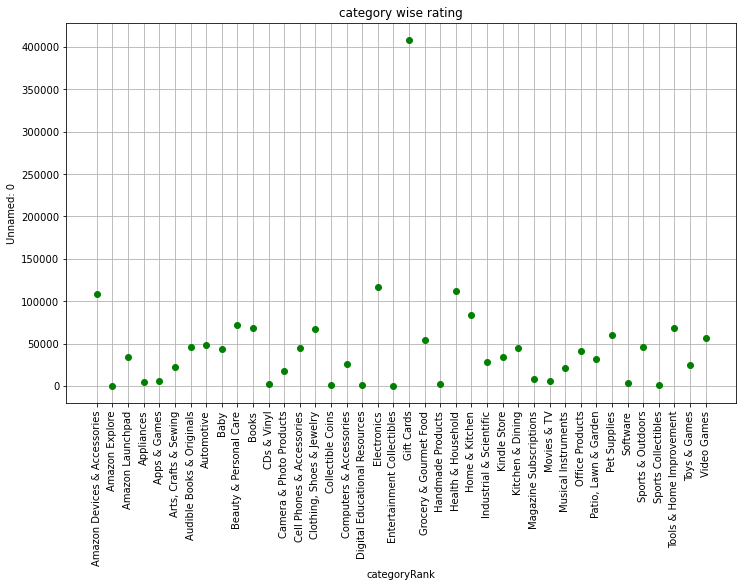

In [23]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)

plt.plot(z,'go')

plt.xlabel('categoryRank')
plt.ylabel('Unnamed: 0')
plt.title('category wise rating')

plt.grid()
plt.show()

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'categoryRank'}>],
       [<AxesSubplot:title={'center':'noRatings'}>, <AxesSubplot:>]],
      dtype=object)

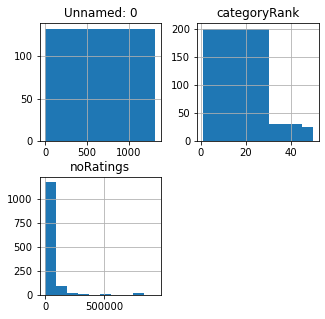

In [24]:
amazon_data.hist(figsize=(5,5))

<AxesSubplot:>

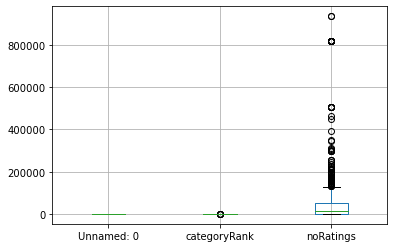

In [25]:
amazon_data.boxplot()